Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
import CNN

# from config_plots import global_settings
# global_settings()
import warnings
warnings.filterwarnings("ignore")

Hyper parameters

In [2]:
# defining global variables
experimentName = "test_22987_suffix50_11_testZCA"
showListOfSpecies = False

from configParser import ConfigParser, getModelName
config_parser = ConfigParser(experimentName)
    
experimentName = experimentName + "/multi-trial"
import TrialStatistics
ts = TrialStatistics.TrialStatistics(experimentName)

Use_old_dataLoader = False
if Use_old_dataLoader:
    import dataLoader
else:
    import dataLoader2 as dataLoader

Cuda support

In [3]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Iterate

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from confusion_matrix_plotter import plot_confusion_matrix2, generate_classification_report
import numpy as np
import os
import progressbar

paramsIterator = config_parser.getHyperpIter()  
number_of_experiments = sum(1 for e in paramsIterator)
paramsIterator = config_parser.getHyperpIter()  
experiment_index = 0

with progressbar.ProgressBar(max_value=number_of_experiments) as bar:
    for experiment_params in paramsIterator:
        bar.update(experiment_index)
        experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1

        print("experiment ", experiment_index+1, "/", number_of_experiments, ": ", experiment_params)

        # load images
        dataset = dataLoader.FishDataset(experiment_params, showListOfSpecies)
        speciesList = dataset.getSpeciesList()
        numberOfSpecies = len(speciesList)

        confusionMatricesPerTrial = []

        for i in range(experiment_params["numOfTrials"]):
            trialName = experimentName+"/"+getModelName(experiment_params, i)

            # Train/Load model
            model = CNN.CNN(numberOfSpecies, experiment_params)
            if os.path.exists(CNN.getModelFile(trialName)):
                _, _, epochs, time_elapsed = CNN.loadModel(model, trialName)
                test_loader = dataLoader.loadTestLoader(trialName)
                print("Model {0} loaded!".format(trialName))
            else:
                train_loader, validation_loader, test_loader = dataLoader.getLoadersFromDataset(dataset, experiment_params, trialName)
                _, _, epochs, time_elapsed = CNN.trainModel(train_loader, validation_loader, experiment_params, model, trialName)

            # Update trial outcomes for statistics
            predlist, lbllist = CNN.getLoaderPredictions(test_loader, model)
            ts.addTrialPredictions(experiment_params, predlist, lbllist, numberOfSpecies)

            ts.addTrial(experiment_params,
                    {'loss': CNN.getCrossEntropyFromLoader(test_loader, model),
                     'accuracy': CNN.getAccuracyFromLoader(test_loader, model),
                     'time': time_elapsed,
                     'epochs': epochs
                    }, i)
        
        experiment_index = experiment_index + 1

N/A% (0 of 8) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment  0 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 3:01:11 Time:  3:01:11
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:01:33 Time:  2:01:33


Early stopping
total number of epochs:  697


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:56:00 Time:  1:56:00


Early stopping
total number of epochs:  635


 12% (1 of 8) |###                       | Elapsed Time: 6:59:39 ETA:   0:00:58

experiment  1 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


Calculating ZCA
Calculating ZCA done


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:27:00 Time:  2:27:00


Early stopping
total number of epochs:  797


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:41:32 Time:  1:41:32


Early stopping
total number of epochs:  571


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:54:36 Time:  2:54:36


Early stopping
total number of epochs:  913


 25% (2 of 8) |######                   | Elapsed Time: 14:04:07 ETA:   0:00:45

experiment  2 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


 25% (2 of 8) |######                   | Elapsed Time: 14:04:07 ETA:   0:00:46

Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 0:56:42 Time:  0:56:42


Early stopping
total number of epochs:  383


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:08:32 Time:  2:08:32


Early stopping
total number of epochs:  873


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:02:27 Time:  2:02:27


Early stopping
total number of epochs:  833


 37% (3 of 8) |#########                | Elapsed Time: 19:12:37 ETA:   0:00:35

experiment  3 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:41:57 Time:  1:41:57


Early stopping
total number of epochs:  688


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:11:36 Time:  2:11:36


Early stopping
total number of epochs:  912


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:42:36 Time:  2:42:36
 50% (4 of 8) |#########          | Elapsed Time: 1 day, 1:49:50 ETA:  10:51:53

experiment  4 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:06 Time:  0:00:06
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 3:00:08 Time:  3:00:08
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:05:26 Time:  2:05:26


Early stopping
total number of epochs:  670


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:20:49 Time:  2:20:49


Early stopping
total number of epochs:  779


 62% (5 of 8) |###########        | Elapsed Time: 1 day, 9:17:11 ETA:   0:00:26

experiment  5 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


 62% (5 of 8) |###########        | Elapsed Time: 1 day, 9:17:11 ETA:   0:00:27

Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Calculating ZCA
Calculating ZCA done


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:26:28 Time:  2:26:28


Early stopping
total number of epochs:  756


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:04:16 Time:  2:04:16


Early stopping
total number of epochs:  650


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:45:27 Time:  2:45:27


Early stopping
total number of epochs:  686


 75% (6 of 8) |#############     | Elapsed Time: 1 day, 16:34:36 ETA:   0:00:18

experiment  6 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:17:13 Time:  2:17:13


Early stopping
total number of epochs:  909


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:14:33 Time:  1:14:33


Early stopping
total number of epochs:  493


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:28:06 Time:  1:28:06


Early stopping
total number of epochs:  578


 87% (7 of 8) |###############   | Elapsed Time: 1 day, 21:35:19 ETA:   0:00:06

experiment  7 / 8 :  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...
Loading saved dataset structure...


100% (550 of 550) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


Calculating ZCA
Calculating ZCA done


N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:55:24 Time:  2:55:24
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 2:38:50 Time:  2:38:50
N/A% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (1000 of 1000) |####################| Elapsed Time: 1:45:22 Time:  1:45:22


Early stopping
total number of epochs:  659


100% (8 of 8) |###########| Elapsed Time: 2 days, 4:59:00 Time: 2 days, 4:59:00


Analyze

In [6]:
ts.showStatistics()
ts.saveStatistics()

Aggregated statistics


In [7]:
ts.showStatistics(False)
ts.saveStatistics(False)

Raw statistics


,image_path,suffix,training_count,validation_count,batchSize,n_epochs,numOfTrials,kernels,kernelSize,patience,imageDimension,n_channels,useZCAWhitening,loss,accuracy,time,epochs,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,False,3.215412,0.581818,10871.467996,1000,-1127031005188183549,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,False,2.180765,0.590909,7293.848704,698,-1127031005188183549,1
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,False,1.665996,0.572727,6960.484215,636,-1127031005188183549,2
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,True,2.536523,0.627273,8820.855717,798,8718085199027706420,0
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,True,2.461802,0.636364,6092.470473,572,8718085199027706420,1
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,1,True,2.646883,0.654545,10476.696143,914,8718085199027706420,2
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,3,False,1.412462,0.609091,3402.246299,384,-4386443188741652914,0
7,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,3,False,2.192098,0.690909,7712.866028,874,-4386443188741652914,1
8,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,3,False,2.006138,0.681818,7347.833508,834,-4386443188741652914,2
9,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,200,1000,3,16 32,5,50,28,3,True,2.467987,0.572727,6117.721239,689,9049333187337694749,0


experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


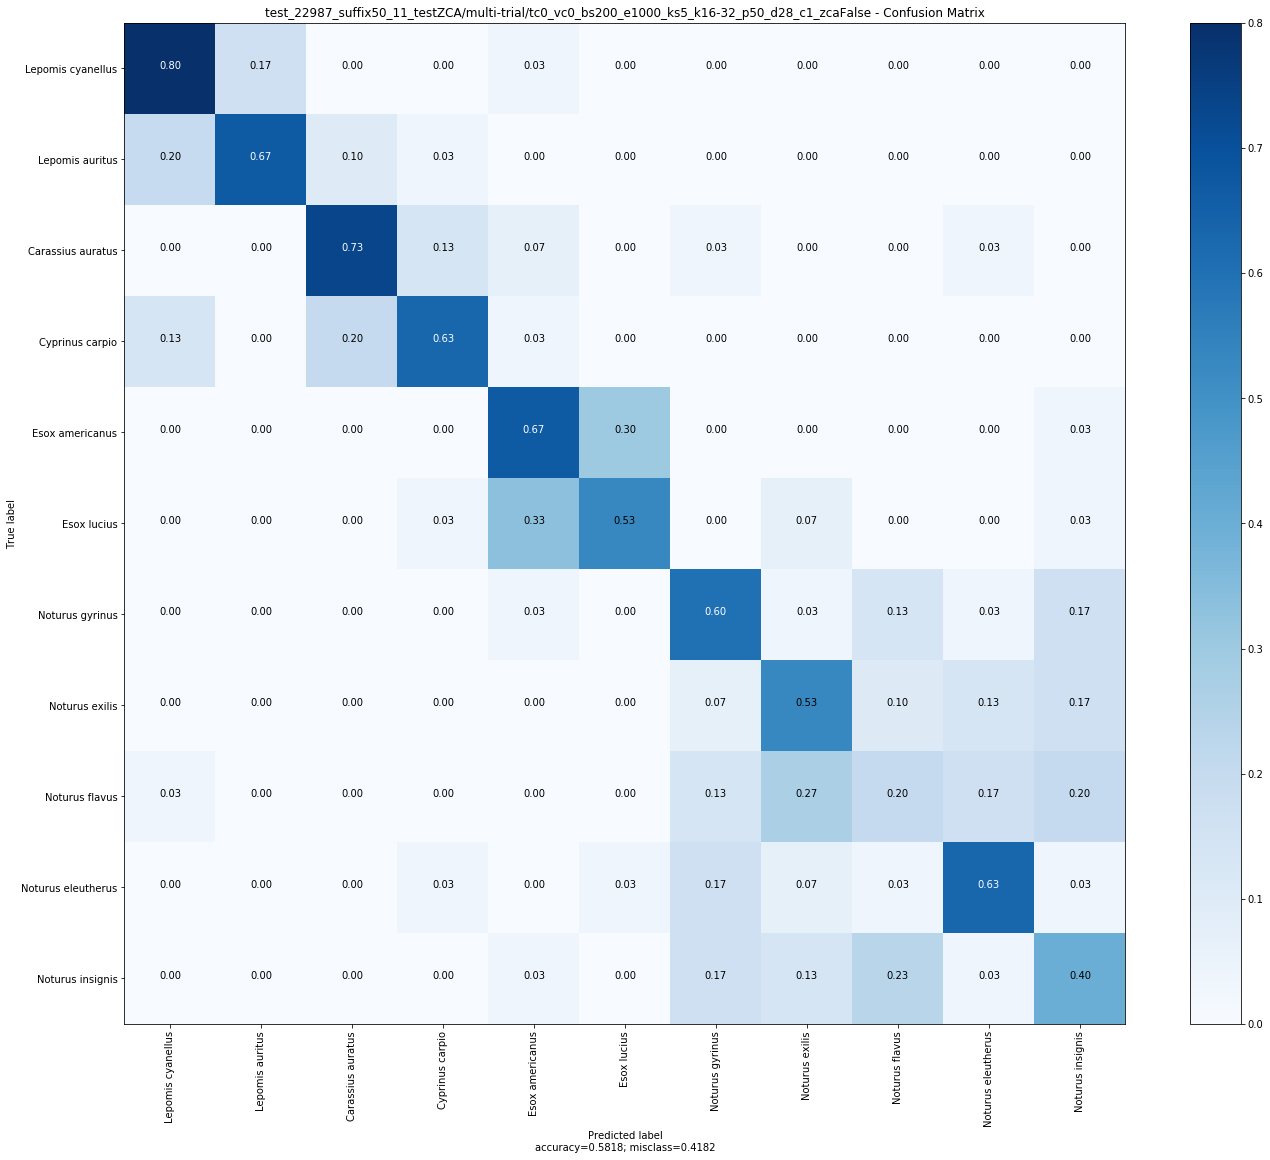

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


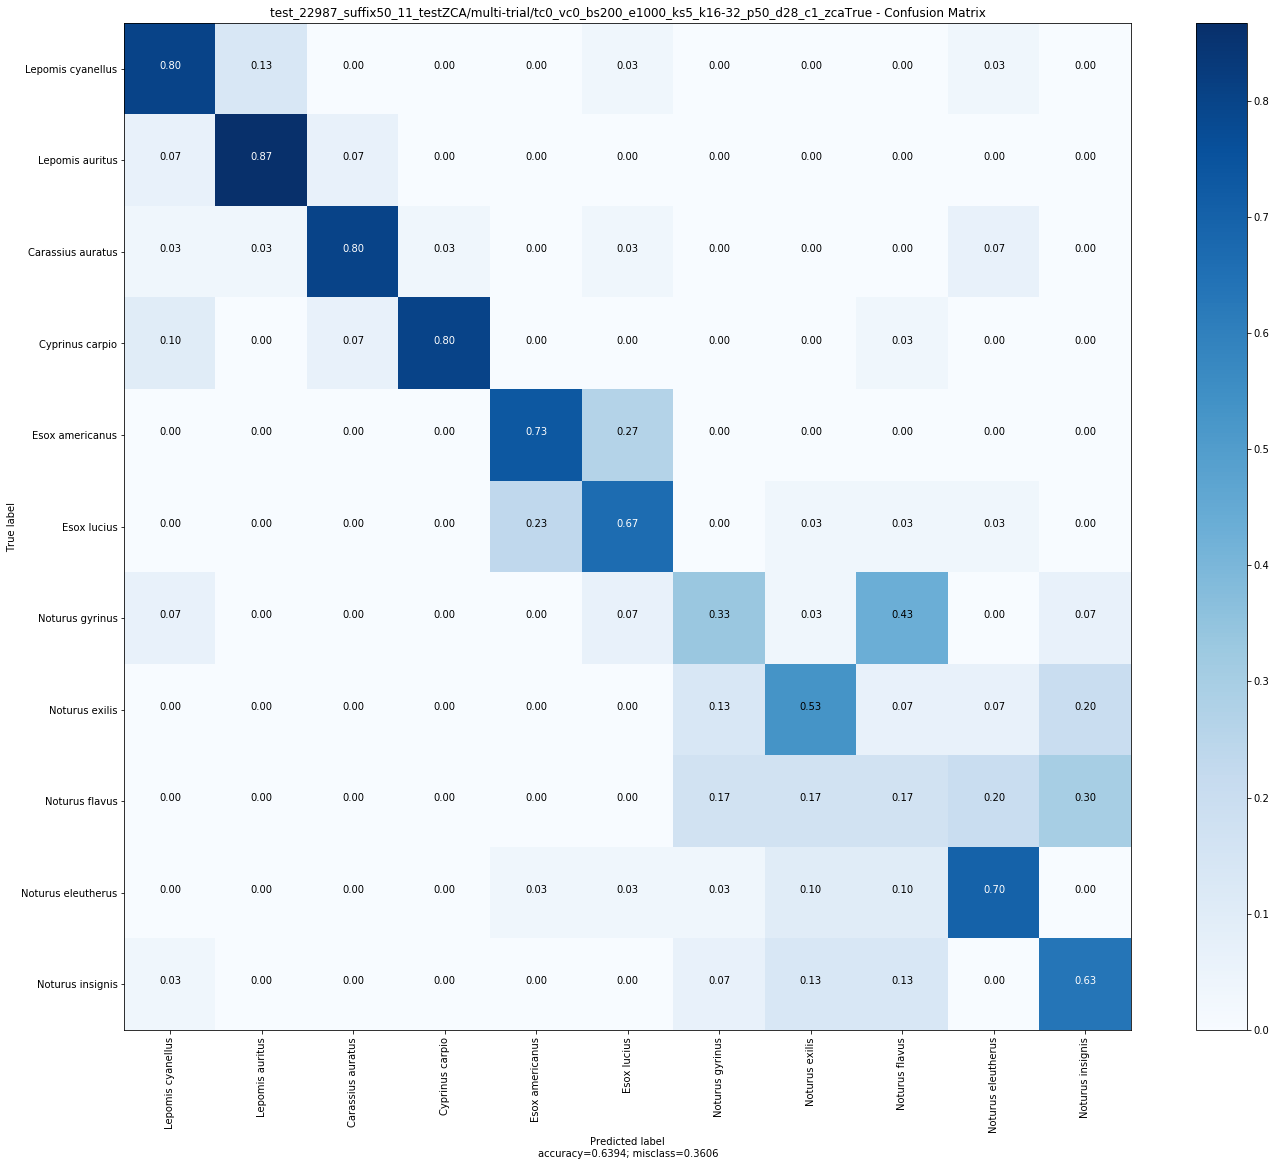

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...


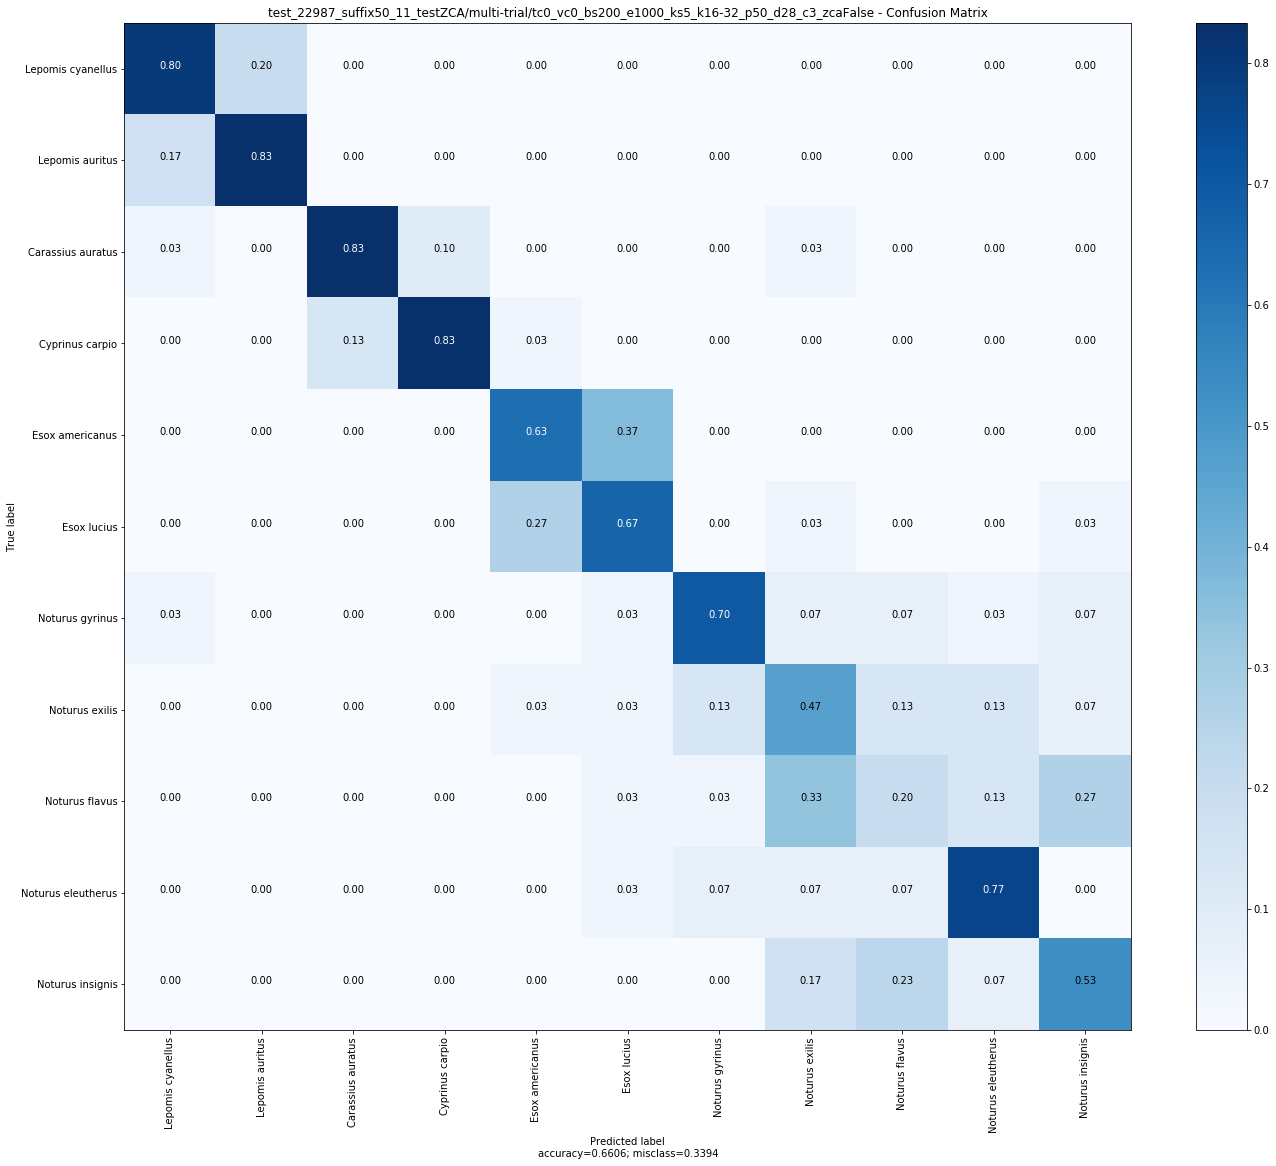

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 28, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


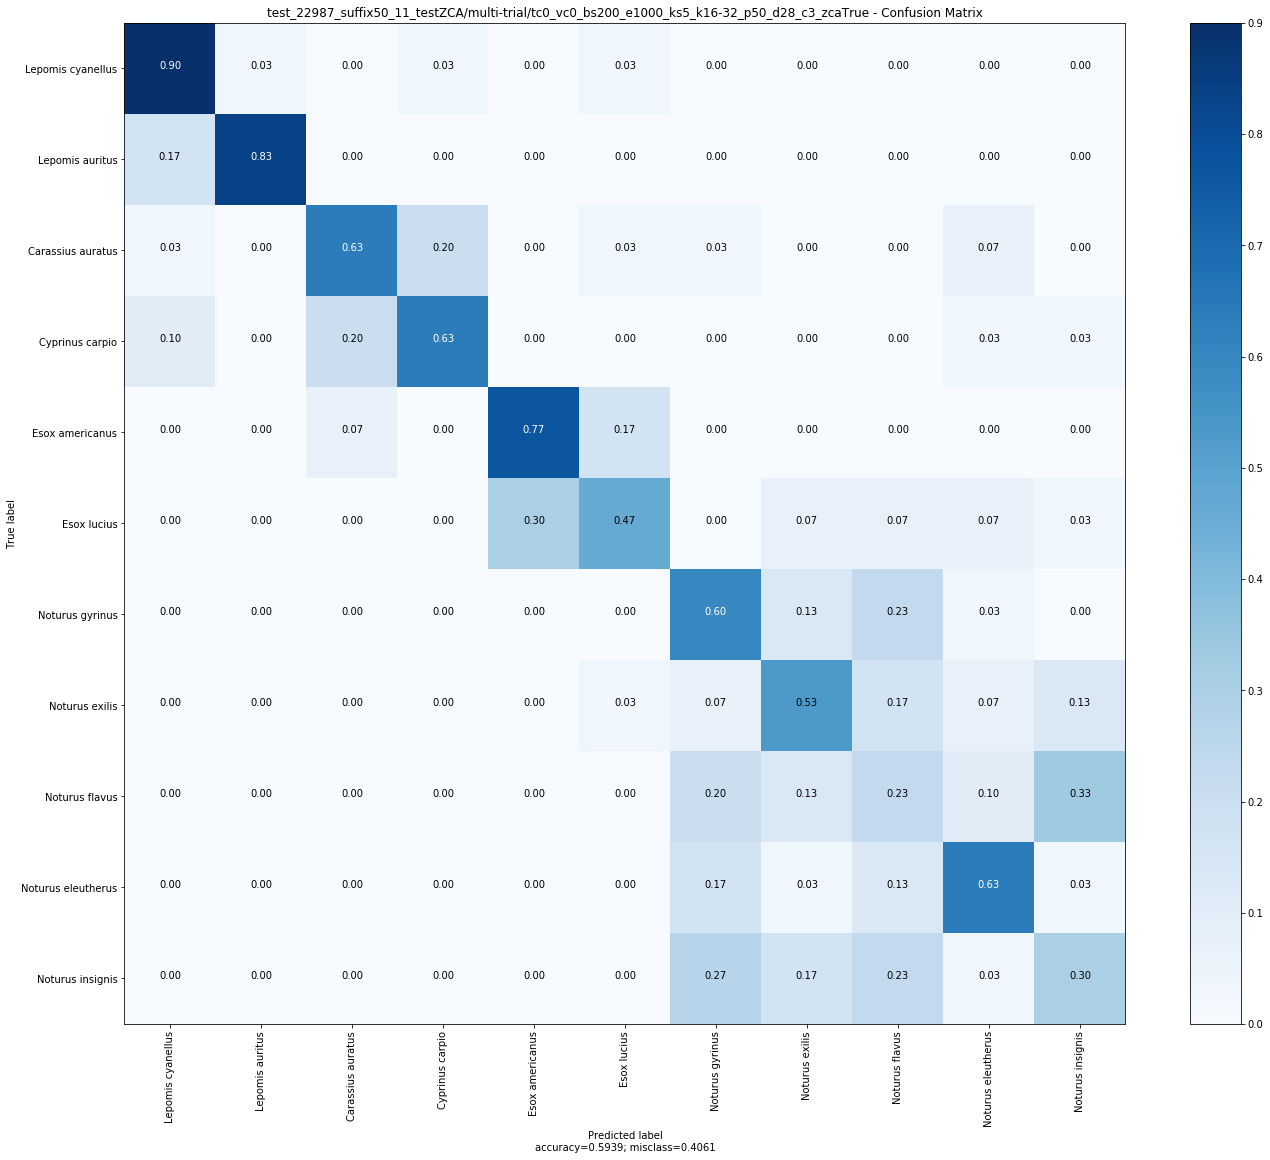

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Loading saved dataset structure...


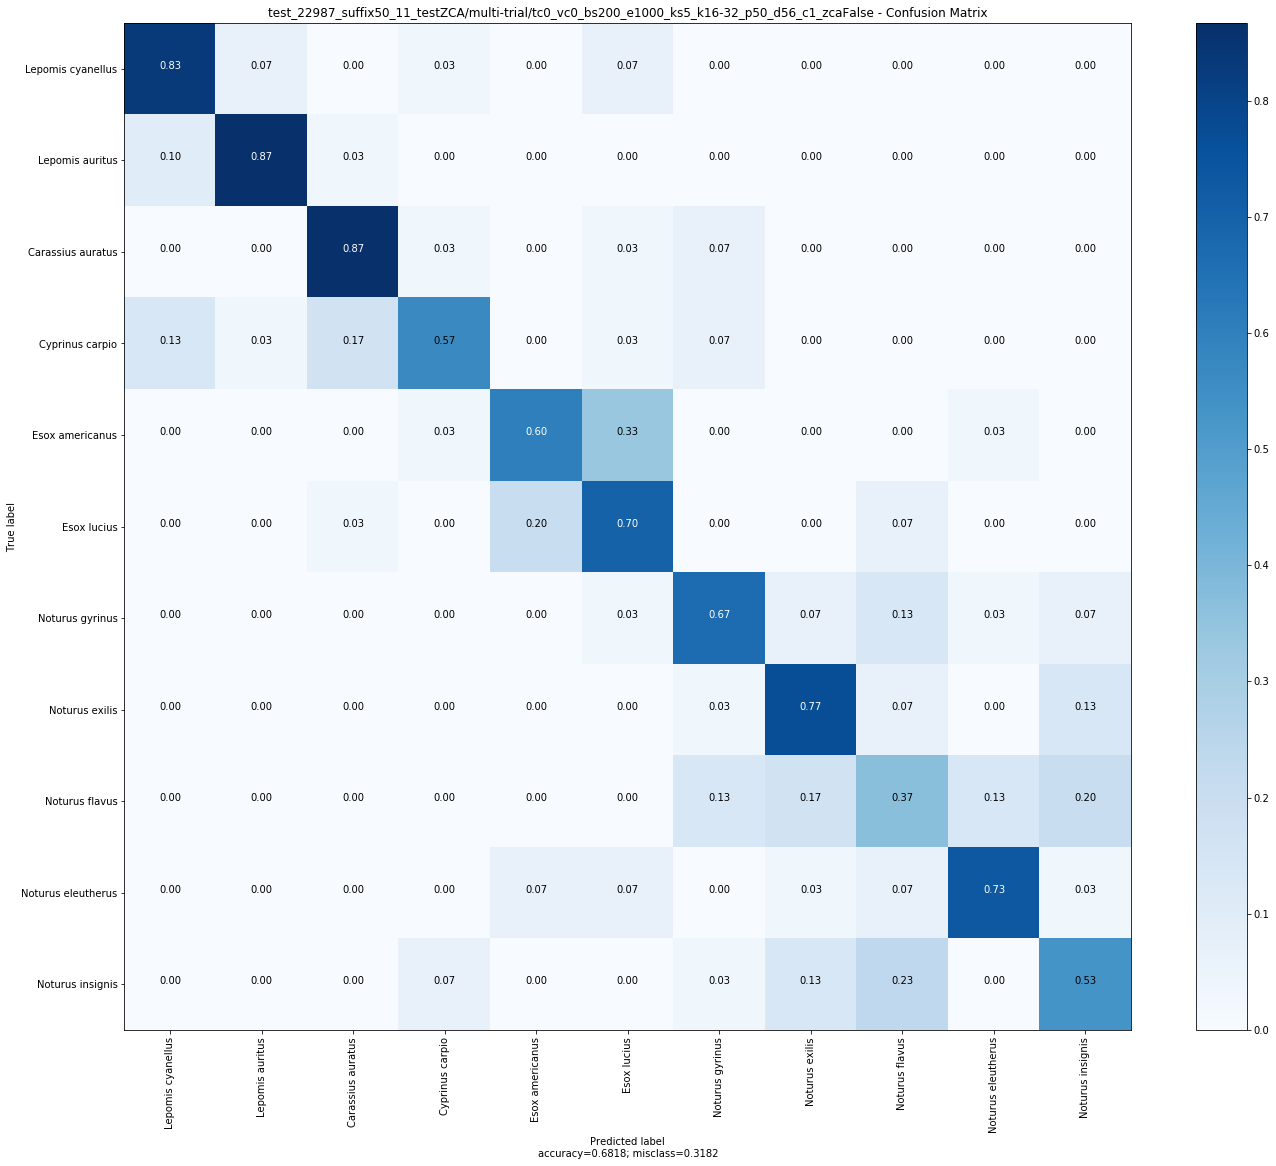

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 1, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


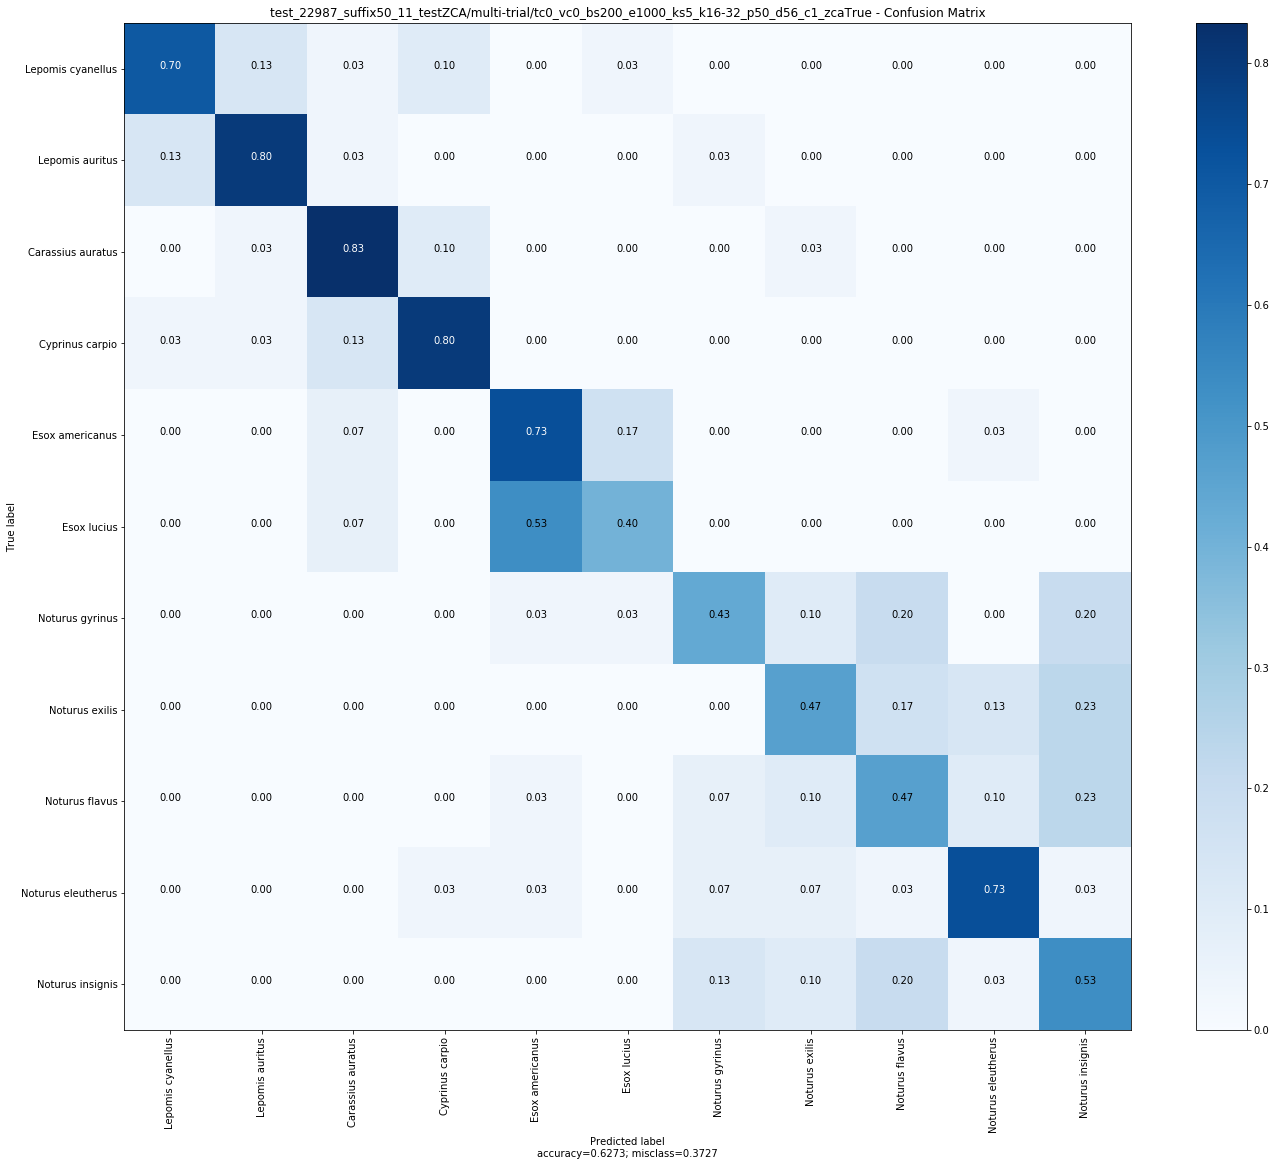

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': False}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Loading saved dataset structure...


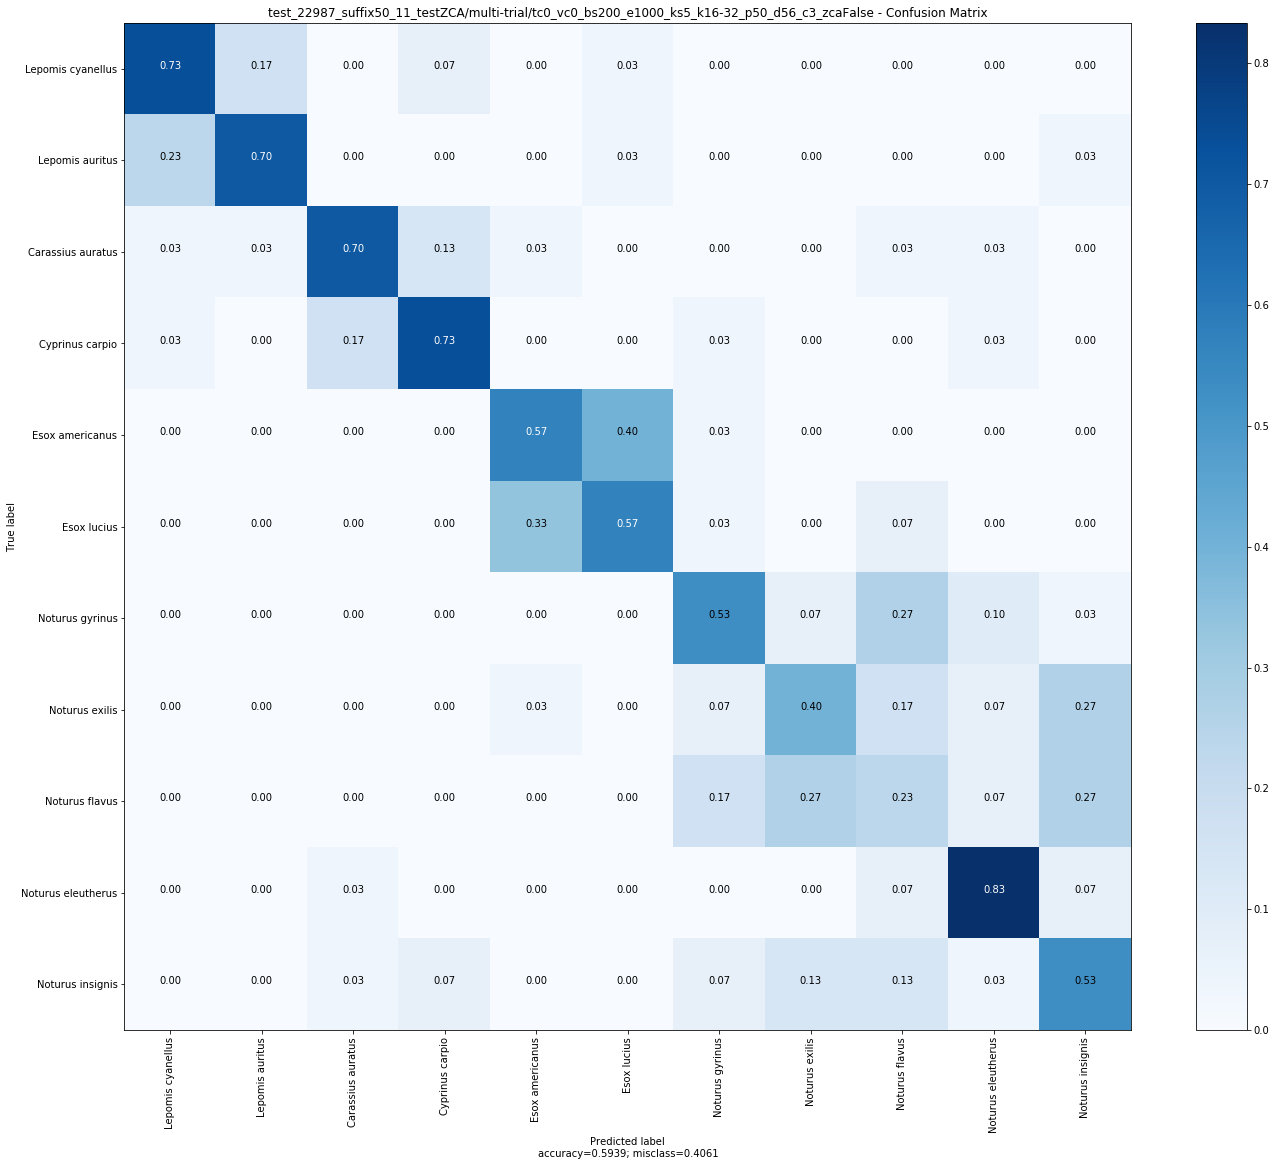

N/A% (0 of 550) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

experiment:  {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 200, 'n_epochs': 1000, 'numOfTrials': 3, 'kernels': [16, 32], 'kernelSize': 5, 'patience': 50, 'imageDimension': 56, 'n_channels': 3, 'useZCAWhitening': True}
Loading dataset...


100% (550 of 550) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


Loading saved dataset structure...
Calculating ZCA
Calculating ZCA done


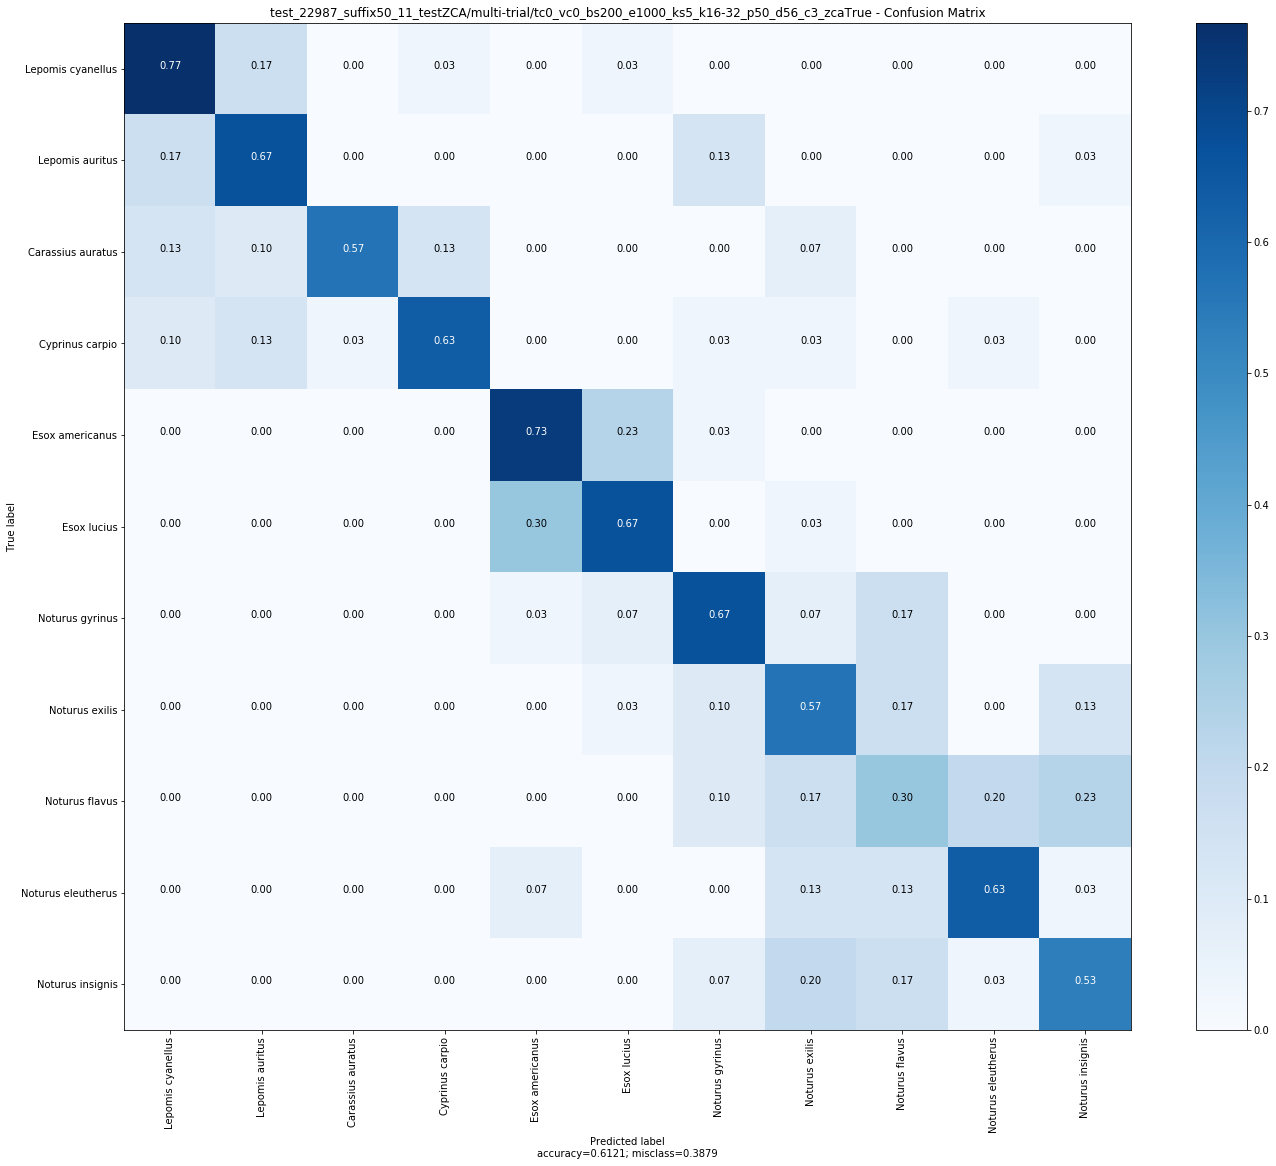

In [8]:
paramsIterator = config_parser.getHyperpIter() 
for experiment_params in paramsIterator:
    experiment_params["numOfTrials"] = experiment_params["numOfTrials"] or 1
    
    print("experiment: ", experiment_params)
    
    dataset = dataLoader.FishDataset(experiment_params, showListOfSpecies)
    speciesList = dataset.getSpeciesList()
    ts.printTrialConfusionMatrix(experiment_params, speciesList, True)